In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [52]:
sales = pd.read_csv("sales.csv", encoding="cp949") #데이터셋 삽입
sales.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액
0,2018,1,D,발달상권,1001046,서울 관악구 신림역_4,CS200036,고시원,83495157.0
1,2018,1,D,발달상권,1001025,서울 관악구 서울대입구역_1,CS200012,법무사사무소,6571318.0
2,2018,1,A,골목상권,1000289,인촌로17가길,CS300021,문구,6044732.0
3,2018,1,A,골목상권,1000515,남부순환로70길,CS200030,피부관리실,11863957.0
4,2018,1,A,골목상권,1000902,논현로63길,CS200029,네일숍,1766586.0


In [53]:
grouped = sales.groupby(sales["상권_코드"]) 
grouped.count()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액
상권_코드,,,,,,,,
1000001,98,98,98,98,98,98,98,98
1000002,82,82,82,82,82,82,82,82
1000003,123,123,123,123,123,123,123,123
1000004,87,87,87,87,87,87,87,87
1000005,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...
1001492,261,261,261,261,261,261,261,261
1001493,227,227,227,227,227,227,227,227
1001494,270,270,270,270,270,270,270,270


In [54]:
sales["기준_분기_코드"] = sales["기준_분기_코드"].astype(str) 
sales["codename"] = sales["상권_코드_명"] + "_" + sales["기준_분기_코드"]

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162666 entries, 0 to 162665
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준_년_코드      162666 non-null  int64  
 1   기준_분기_코드     162666 non-null  object 
 2   상권_구분_코드     162666 non-null  object 
 3   상권_구분_코드_명   162666 non-null  object 
 4   상권_코드        162666 non-null  int64  
 5   상권_코드_명      162666 non-null  object 
 6   서비스_업종_코드    162666 non-null  object 
 7   서비스_업종_코드_명  162666 non-null  object 
 8   당월_매출_금액     162666 non-null  float64
 9   codename     162666 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 12.4+ MB


In [55]:
codename = sales[["codename", "당월_매출_금액"]].groupby(["codename"]).sum()

In [56]:
populations = pd.read_csv("population.csv", encoding="cp949")

In [57]:
populations["기준_분기_코드"] = populations["기준_분기_코드"].astype(str)
populations.head()


,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,2018,4,U,관광특구,1001496,강남 마이스 관광특구,56902,28758,28144,1629,...,10771,7075,4671,7998,8095,8259,9065,9430,7825,6231
1,2018,4,U,관광특구,1001495,잠실 관광특구,1912079,999600,912478,63540,...,311495,281954,218729,252423,261747,264112,267216,285869,307641,273073
2,2018,4,U,관광특구,1001494,종로?청계 관광특구,4524906,2495178,2029729,128226,...,701058,663258,618543,663820,666481,671373,668225,744226,673989,436790
3,2018,4,U,관광특구,1001493,동대문패션타운 관광특구,2757199,1403409,1353794,75139,...,466816,421201,296067,414745,441446,438627,433242,442099,341106,245938
4,2018,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,4905600,2396566,2509038,95003,...,952438,736398,558331,760239,760679,769328,791442,806879,593408,423623


In [58]:
populations["codename"] = populations["상권_코드_명"] + "_" + populations["기준_분기_코드"]
total = pd.merge(codename, populations, on="codename", how="right")
total.head()

,codename,당월_매출_금액,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,...,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,가락시장_1,4.715756e+11,2018,1,D,발달상권,1001060,가락시장,7790,4893,...,1739,2033,1367,1189,1246,1253,1171,1195,1038,697
1,가락시장_2,4.331224e+11,2018,2,D,발달상권,1001060,가락시장,10827,6592,...,2375,2789,1937,1647,1671,1637,1689,1756,1475,952
2,가락시장_3,5.080519e+11,2018,3,D,발달상권,1001060,가락시장,10209,6367,...,2249,2667,1875,1511,1564,1555,1657,1701,1355,867
3,가락시장_4,5.030242e+11,2018,4,D,발달상권,1001060,가락시장,10089,6378,...,2146,2649,1965,1495,1521,1531,1563,1640,1426,913
4,가로공원로58길_1,8.171057e+08,2018,1,A,골목상권,1000507,가로공원로58길,30938,18062,...,5791,7937,5101,4607,4239,4202,4268,4294,4303,5024


In [59]:
total.dropna(axis=0,inplace=True)

x= total[['총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수',
          '월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수','일요일_유동인구_수']]
y = total[['당월_매출_금액']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

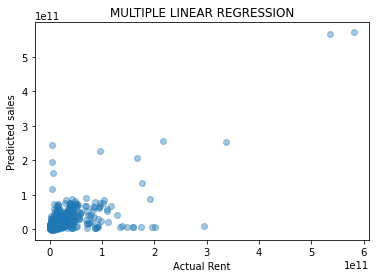

In [60]:
mlr = LinearRegression() #선형회귀 함수
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4) 
plt.xlabel("Actual Rent")
plt.ylabel("Predicted sales")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [61]:
print(mlr.coef_) #상관계수 확인

print(mlr.score(x_train, y_train)) #예측 정확도

[[-3.87640185e+07  3.64208024e+08  3.64247800e+08 -1.69856690e+08
  -1.69786765e+08 -1.69647457e+08 -1.69411088e+08 -1.69797437e+08
  -1.69940177e+08 -1.56550523e+08 -1.54833797e+08 -1.56100633e+08
  -1.55178894e+08 -1.55971751e+08 -1.55038394e+08 -1.56279536e+08]]
0.4797306038359531


In [62]:
X_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary() #다중선형회귀 모델 분석 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               당월_매출_금액   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              324.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        01:49:36   Log-Likelihood:                     -1.0582e+05
No. Observations:                4167   AIC:                                  2.117e+05
Df Residuals:                    4151   BIC:                                  2.118e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
총_유동인구_수         -7.525e+07   2.42e+08     -0.310      0.756    -5.5e+08       4e+08
남성_유동인구_수         3.487e+08    2.2e+08      1.588      0.112   -8.17e+07    7.79e+08
여성_유동인구_수         3.487e+08    2.2e+08      1.588      0.112   -8.17e+07    7.79e+08
연령대_10_유동인구_수    -1.497e+08   1.41e+08     -1.062      0.288   -4.26e+08    1.27e+08
연령대_20_유동인구_수    -1.496e+08   1.41e+08     -1.062      0.288   -4.26e+08    1.27e+08
연령대_30_유동인구_수    -1.494e+08   1.41e+08     -1.061      0.289   -4.26e+08    1.27e+08
연령대_40_유동인구_수    -1.492e+08   1.41e+08     -1.059      0.289   -4.25e+08    1.27e+08
연령대_50_유동인구_수    -1.496e+08   1.41e+08     -1.062      0.288   -4.26e+08    1.27e+08
연령대_60_이상_유동인구_수 -1.497e+08   1.41e+08     -1.063      0.288   -4.26e+08    1.26e+08
월요일_유동인구_수       -1.247e+08   1.32e+08     -0.945      0.345   -3.83e+08    1.34e+08
화요일_유동인구_수       -1.231e+08   1.32e+08     -0.933      0.351   -3.82e+08    1.36e+08
수요일_유동인구_수       -1.242e+08   1.32e+08     -0.942      0.346   -3.83e+08    1.34e+08
목요일_유동인구_수       -1.233e+08   1.32e+08     -0.935      0.350   -3.82e+08    1.35e+08
금요일_유동인구_수       -1.243e+08   1.32e+08     -0.942      0.346   -3.83e+08    1.34e+08
토요일_유동인구_수       -1.233e+08   1.32e+08     -0.935      0.350   -3.82e+08    1.35e+08
일요일_유동인구_수       -1.244e+08   1.32e+08     -0.943      0.346   -3.83e+08    1.34e+08
==============================================================================
Omnibus:                     6391.045   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3537467.142
Skew:                           9.509   Prob(JB):                         0.00
Kurtosis:                     144.466   Cond. No.                     6.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
x= total[['남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수','연령대_20_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) #유동인구와의 관계가 유의한 성별, 연령별 유동인구수만 x변수로 남기고, train 데이터셋과 test 데이터셋을 8:2 비율로 나눔

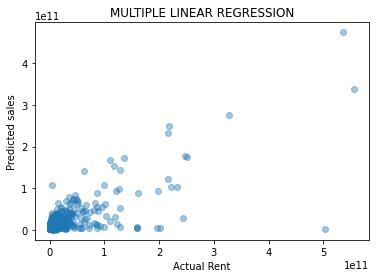

In [64]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted sales")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [65]:
print(mlr.coef_)

print(mlr.score(x_train, y_train))

[[ 1.52259274e+08  1.52334375e+08 -1.52392643e+08 -1.52297249e+08
  -1.52065127e+08 -1.52035658e+08 -1.52617359e+08 -1.52245128e+08]]
0.44052111582554876


In [66]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary() #다중선형회귀모델 분석 결과

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               당월_매출_금액   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:49:39   Log-Likelihood:            -1.2063e+05
No. Observations:                4763   AIC:                         2.413e+05
Df Residuals:                    4754   BIC:                         2.413e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.524e+09   4.83e+08      5.227      0.000    1.58e+09    3.47e+09
남성_유동인구_수         1.523e+08   1.14e+08      1.332      0.183   -7.18e+07    3.76e+08
여성_유동인구_수         1.523e+08   1.14e+08      1.333      0.183   -7.17e+07    3.76e+08
연령대_10_유동인구_수    -1.524e+08   1.14e+08     -1.334      0.182   -3.76e+08    7.16e+07
연령대_20_유동인구_수    -1.523e+08   1.14e+08     -1.333      0.183   -3.76e+08    7.17e+07
연령대_30_유동인구_수    -1.521e+08   1.14e+08     -1.331      0.183   -3.76e+08     7.2e+07
연령대_40_유동인구_수     -1.52e+08   1.14e+08     -1.330      0.183   -3.76e+08     7.2e+07
연령대_50_유동인구_수    -1.526e+08   1.14e+08     -1.336      0.182   -3.77e+08    7.14e+07
연령대_60_이상_유동인구_수 -1.522e+08   1.14e+08     -1.332      0.183   -3.76e+08    7.18e+07
==============================================================================
Omnibus:                     6897.507   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3327167.416
Skew:                           8.513   Prob(JB):                         0.00
Kurtosis:                     131.356   Cond. No.                     5.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""